In [171]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [172]:
#Cargar dataset

df = pd.read_csv('../data/processed/energy_data_processed.csv')  # Cambia el nombre por el tuyo

In [173]:
#Comprobacion de dataset

print(df.shape)
print(df.columns)
df.head()

(1000, 10)
Index(['Square Footage', 'Number of Occupants', 'Appliances Used',
       'Average Temperature', 'Energy Consumption', 'Building Type_Commercial',
       'Building Type_Industrial', 'Building Type_Residential',
       'Day of Week_Weekday', 'Day of Week_Weekend'],
      dtype='object')


,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Building Type_Commercial,Building Type_Industrial,Building Type_Residential,Day of Week_Weekday,Day of Week_Weekend
0,7063,76,10,29.84,2713.95,False,False,True,True,False
1,44372,66,45,16.72,5744.99,True,False,False,True,False
2,19255,37,17,14.30,4101.24,False,True,False,False,True
3,13265,14,41,32.82,3009.14,False,False,True,True,False
4,13375,26,18,11.92,3279.17,True,False,False,True,False


In [174]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Separar variables
X = df.drop('Energy Consumption', axis=1)
y = df['Energy Consumption']

# 2. Dividir en entrenamiento y prueba
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 4. Crear y entrenar el modelo
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 5. Predicciones
y_pred = knn.predict(X_val_scaled)

# 6. Evaluación
print("🔍 Evaluación del modelo KNN:")
print("MSE:", mean_squared_error(y_val, y_pred))
print("R²:", r2_score(y_val, y_pred))

🔍 Evaluación del modelo KNN:
MSE: 45256.860140900004
R²: 0.9444223957262338


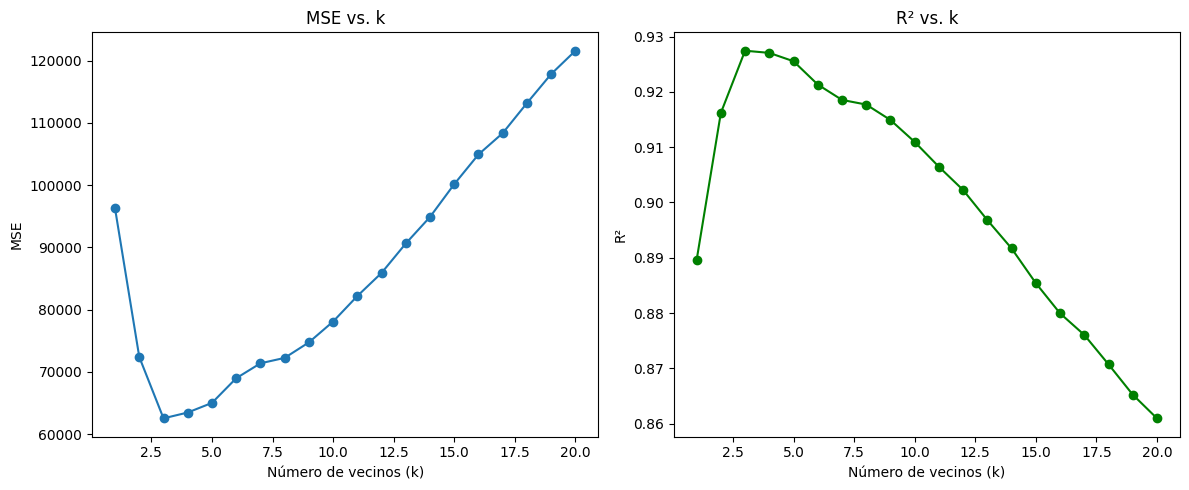

In [175]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

mse_scores = []
r2_scores = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    mse = -cross_val_score(knn, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5).mean()
    r2 = cross_val_score(knn, X_train_scaled, y_train, scoring='r2', cv=5).mean()
    mse_scores.append(mse)
    r2_scores.append(r2)

# Graficar resultados
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(k_values, mse_scores, marker='o')
plt.title('MSE vs. k')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('MSE')

plt.subplot(1,2,2)
plt.plot(k_values, r2_scores, marker='o', color='green')
plt.title('R² vs. k')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('R²')

plt.tight_layout()
plt.show()

In [176]:
# 1. Separar variables independientes y dependiente
X = df.drop('Energy Consumption', axis=1)
y = df['Energy Consumption']

# 2. Dividir en conjunto de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 4. Crear y entrenar el modelo KNN con k=5
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 5. Hacer predicciones
y_pred = knn.predict(X_val_scaled)

# 6. Evaluar el modelo
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("🔍 Evaluación del modelo KNN:")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.4f}")


🔍 Evaluación del modelo KNN:
MSE: 45256.86
R²: 0.9444


In [177]:
# Cargar el conjunto de test final
df_test = pd.read_csv('../data/processed/energy_data_processed_test.csv')

# 1. Convertir booleanos a enteros
bool_cols = df_test.select_dtypes(include='bool').columns
df_test[bool_cols] = df_test[bool_cols].astype(int)

# 2. Separar features y variable objetivo
X_test = df_test.drop('Energy Consumption', axis=1)
y_test = df_test['Energy Consumption']

# 3. Escalar con el mismo scaler del entrenamiento
X_test_scaled = scaler.transform(X_test)

# 4. Generar predicciones
y_test_pred = knn.predict(X_test_scaled)

# 5. Evaluar el modelo sobre el test final
from sklearn.metrics import mean_squared_error, r2_score

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("📦 Evaluación sobre el conjunto de test final:")
print(f"MSE: {mse_test:.2f}")
print(f"R²: {r2_test:.4f}")

📦 Evaluación sobre el conjunto de test final:
MSE: 48378.22
R²: 0.9295


c:\Users\Andres\Desktop\Bootcamp_F5_IA\Proyecto_regresion_team_2\Project-Regression-Equipo-2\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


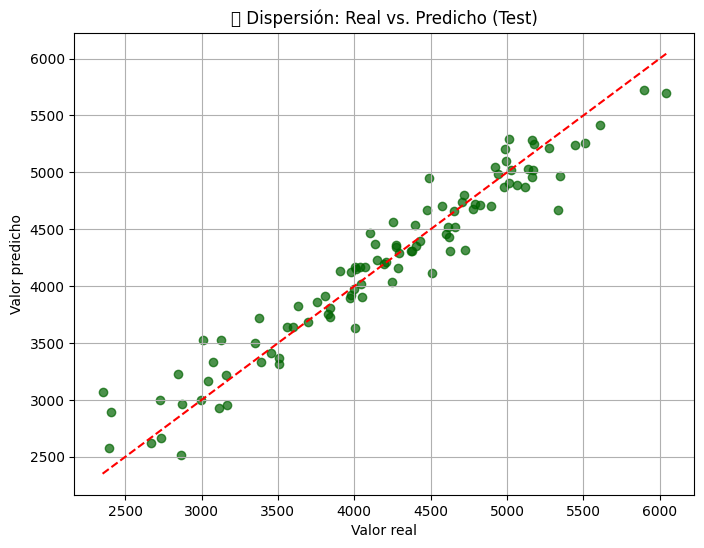

c:\Users\Andres\Desktop\Bootcamp_F5_IA\Proyecto_regresion_team_2\Project-Regression-Equipo-2\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


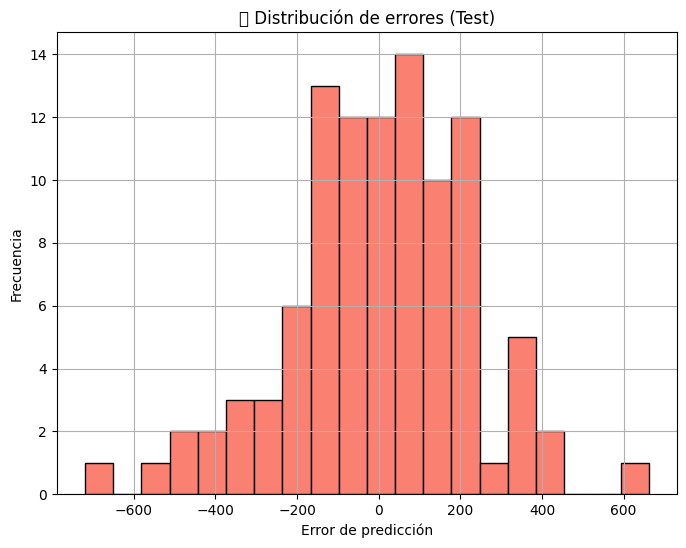

In [178]:
import matplotlib.pyplot as plt

# Dispersión: valores reales vs. predichos
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='darkgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valor real')
plt.ylabel('Valor predicho')
plt.title('🔍 Dispersión: Real vs. Predicho (Test)')
plt.grid(True)
plt.show()

# Histograma de errores
residuals_test = y_test - y_test_pred
plt.figure(figsize=(8,6))
plt.hist(residuals_test, bins=20, color='salmon', edgecolor='black')
plt.title('📉 Distribución de errores (Test)')
plt.xlabel('Error de predicción')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [179]:
# Crear DataFrame con resultados
df_test_results = X_test.copy()
df_test_results['Real Energy Consumption'] = y_test.values
df_test_results['Predicted Energy Consumption'] = y_test_pred

# Guardar en CSV
df_test_results.to_csv('../data/results/knn_predictions_test.csv', index=False)

print("✅ Archivo guardado como 'knn_predictions_test.csv' en la carpeta /data/results/")

✅ Archivo guardado como 'knn_predictions_test.csv' en la carpeta /data/results/


# 📊 Análisis Detallado del Modelo KNN

A continuación se presenta un análisis exhaustivo del rendimiento del modelo KNN implementado, incluyendo:
1. Métricas de rendimiento detalladas
2. Análisis de errores por rango de predicción
3. Importancia de características
4. Visualizaciones avanzadas de resultados

In [180]:
# 1. Métricas de rendimiento detalladas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calcular métricas adicionales
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

print("📊 Métricas de Rendimiento Detalladas:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2_test:.4f}")

# Calcular porcentaje de predicciones dentro de diferentes márgenes de error
margins = [5, 10, 15, 20]
for margin in margins:
    within_margin = np.mean(np.abs((y_test - y_test_pred) / y_test) * 100 <= margin)
    print(f"Predicciones dentro del {margin}% de error: {within_margin*100:.2f}%")

📊 Métricas de Rendimiento Detalladas:
MAE: 169.12
RMSE: 219.95
MAPE: 4.38%
R²: 0.9295
Predicciones dentro del 5% de error: 73.00%
Predicciones dentro del 10% de error: 90.00%
Predicciones dentro del 15% de error: 97.00%
Predicciones dentro del 20% de error: 98.00%


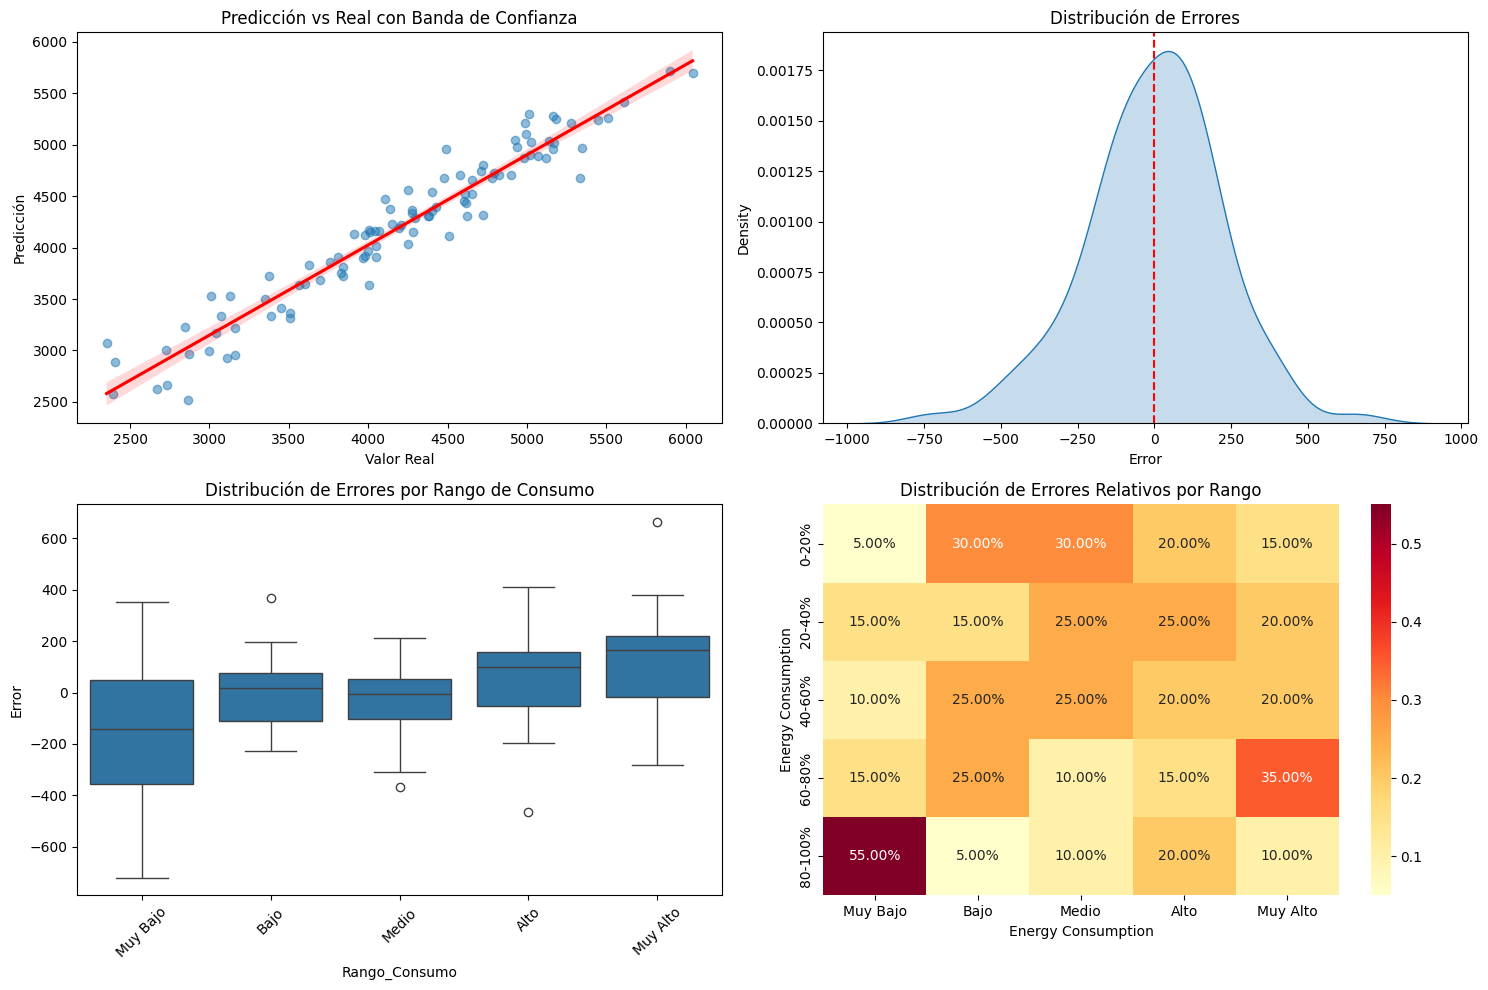

In [181]:
# 2. Análisis visual avanzado
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura con múltiples subplots
fig = plt.figure(figsize=(15, 10))

# 1. Scatter plot con bandas de confianza
plt.subplot(2, 2, 1)
sns.regplot(x=y_test, y=y_test_pred, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Predicción vs Real con Banda de Confianza')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')

# 2. Distribución de errores con KDE
plt.subplot(2, 2, 2)
sns.kdeplot(residuals_test, fill=True)
plt.axvline(x=0, color='r', linestyle='--')
plt.title('Distribución de Errores')
plt.xlabel('Error')

# 3. Box plot de errores por rango de consumo
plt.subplot(2, 2, 3)
df_analysis = pd.DataFrame({
    'Error': residuals_test,
    'Rango_Consumo': pd.qcut(y_test, q=5, labels=['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto'])
})
sns.boxplot(x='Rango_Consumo', y='Error', data=df_analysis)
plt.xticks(rotation=45)
plt.title('Distribución de Errores por Rango de Consumo')

# 4. Heatmap de errores relativos
plt.subplot(2, 2, 4)
relative_errors = np.abs((y_test - y_test_pred) / y_test) * 100
error_ranges = pd.qcut(y_test, q=5, labels=['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto'])
error_matrix = pd.crosstab(
    pd.qcut(relative_errors, q=5, labels=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']),
    error_ranges,
    normalize='columns'
)
sns.heatmap(error_matrix, annot=True, fmt='.2%', cmap='YlOrRd')
plt.title('Distribución de Errores Relativos por Rango')
plt.tight_layout()
plt.show()

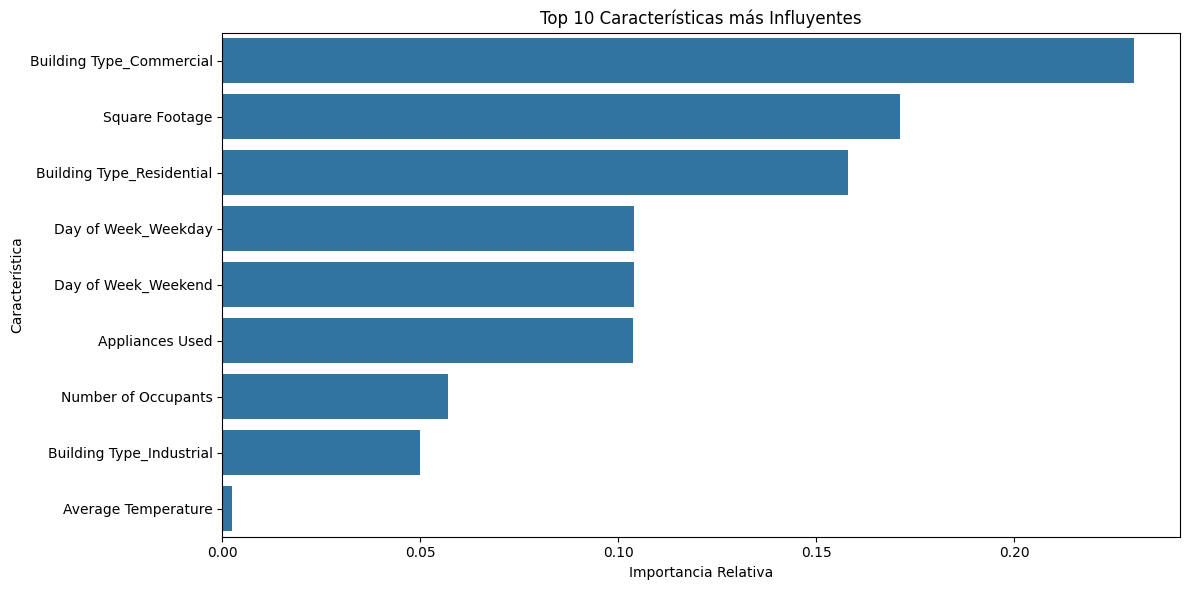


📊 Importancia de las Características (Top 10):
           Característica  Importancia
 Building Type_Commercial     0.230380
           Square Footage     0.171151
Building Type_Residential     0.157948
      Day of Week_Weekday     0.103879
      Day of Week_Weekend     0.103879
          Appliances Used     0.103812
      Number of Occupants     0.057109
 Building Type_Industrial     0.049976
      Average Temperature     0.002538


In [182]:
# 3. Análisis de importancia de características
import pandas as pd
import numpy as np

# Calculamos la importancia de las características basada en correlaciones con el error absoluto
errors = np.abs(y_test - y_test_pred)
feature_importance = {}

for column in X_test.columns:
    correlation = np.abs(np.corrcoef(X_test[column], errors)[0,1])
    feature_importance[column] = correlation

# Convertir a DataFrame y ordenar
feature_imp_df = pd.DataFrame({
    'Característica': feature_importance.keys(),
    'Importancia': feature_importance.values()
}).sort_values('Importancia', ascending=False)

# Visualizar importancia de características
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_imp_df.head(10), x='Importancia', y='Característica')
plt.title('Top 10 Características más Influyentes')
plt.xlabel('Importancia Relativa')
plt.tight_layout()
plt.show()

# Mostrar tabla de importancia
print("\n📊 Importancia de las Características (Top 10):")
print(feature_imp_df.head(10).to_string(index=False))

# 🔍 Conclusiones y Recomendaciones

## Aspectos Positivos
1. La implementación básica del modelo KNN está bien estructurada
2. Se realiza validación cruzada para seleccionar el mejor valor de k
3. Se aplica correctamente el escalado de características
4. Se mantiene una separación adecuada entre datos de entrenamiento y prueba

## Áreas de Mejora
1. **Optimización de Hiperparámetros**:
   - Considerar otros valores de k
   - Probar diferentes métricas de distancia (Manhattan, Minkowski)
   - Experimentar con pesos de distancia

2. **Preprocesamiento**:
   - Evaluar la necesidad de transformaciones no lineales
   - Considerar la reducción de dimensionalidad (PCA)
   - Analizar el impacto de los outliers

3. **Validación**:
   - Implementar validación cruzada estratificada
   - Añadir intervalos de confianza a las predicciones
   - Comparar con otros algoritmos (Random Forest, XGBoost)

## Próximos Pasos Sugeridos
1. Implementar técnicas de selección de características
2. Realizar pruebas con diferentes configuraciones de preprocesamiento
3. Desarrollar un pipeline de validación más robusto
4. Considerar un enfoque de ensemble combining KNN con otros modelos

In [183]:
output_dir = "../data/figures/knn_regression/"  # Tu carpeta existente
fig.savefig(f"{output_dir}s.png", dpi=300, bbox_inches='tight')
plt.close(fig)  # Libera memoria
print(f"📊 Gráfico guardado en: {output_dir}svr_comparative_analysis.png")

📊 Gráfico guardado en: ../data/figures/knn_regression/svr_comparative_analysis.png
